<a href="https://colab.research.google.com/github/ttlevt/test_git/blob/master/05_Karas1_lec_%EC%8B%A0%EC%9E%AC%ED%9B%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## load MNIST data

In [0]:
##### tensorflow를 보다 사용하기 편하게 래핑한 모듈 : 케라스
##### 케라스의 데이터셋에서 mnist데이터를 불러옴

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential

##### 딥러닝을위한 패키지 import

In [0]:
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

##### mnist의 데이터에서 train test데이터 분리

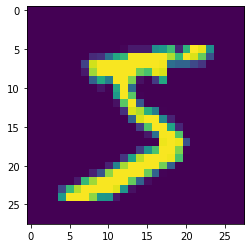

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [0]:
##### 28*28 픽셀로 구성된 그림? -> 컴퓨터가 인식할수있게 1차원 배열로 재배치

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
# reshape전 28*28 확인
x_train[0]

In [0]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train sample')
print(x_test.shape[0], 'x_test sample')

60000 train sample
10000 x_test sample


In [0]:
#reshape후 784로 변경됨
x_train[0]

##### num_classes = 여기서는 고유 숫자의 개수라고 할수있다

In [0]:
num_classes = 10

In [0]:
##### to_categorical
##### 클래스 벡터 (정수)를 이진 클래스 행렬로 변환합니다.

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('x_train', x_train[0])
print('y_train', y_train[0])
# y_train값은 5가 됩니다

x_train [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

## Create Model

'''
Sequential 모델은 레이어를 선형으로 연결하여 구성합니다. 
레이어 인스턴스를 생성자에게 넘겨줌으로써 Sequential 모델을 구성할 수 있습니다.
'''

In [0]:
model = Sequential()

In [0]:
'''
Dense는 다음과 같은 작업을 구현합니다: output = activation(dot(input, kernel) + bias) 
여기서 activation은 activation 인수로 전달되는 성분별 활성화 함수이고, kernel은 레이어가 만들어낸 가중치 행렬이며,
bias는 레이어가 만들어낸 편향 벡터입니다 (use_bias가 True인 경우만 적용 가능합니다).

참고: 레이어의 인풋이 2를 넘는 계수를 갖는 경우 kernel과의 초기 점곱 전에 일렬화됩니다.
'''

In [0]:
'''
참조 : https://keras.io/ko/activations/
사용가능한 Activations 
softmax : Softmax 활성화 함수
elu :
selu : 
softplus :
softsign :
relu : 
tanh
sigmoid
hard_sigmoid
exponential
linear

"고급 Activations": 간단한 함수보다 더 복잡한 함수들
'''

In [0]:
model.add(Dense(512, activation='relu', input_shape=(784,))) # input layer
model.add(Dense(512, activation='relu')) # hidden layer1
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
_________________________________________________________________
dense_10 (Dense)             (None, 512)               5632      
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
________________________________________________

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [0]:
##### 손실함수 적용 : 'categorical_crossentropy'
''' 
사용가능한 손실함수 종류 
mean_squared_error
mean_absolute_error
mean_absolute_percentage_error
mean_squared_logarithmic_error
squared_hinge
hinge
categorical_hinge
logcosh
categorical_crossentropy
sparse_categorical_crossentropy
binary_crossentropy
kullback_leibler_divergence
poisson
cosine_proximity
Note: 손실 함수 categorical_crossentropy의 경우 사용되는 타겟들은 범주 형식(categorical format)을 따라야 합니다.
예를 들어 10개의 클래스(범주) 중 하나에 속하는 데이터에 대하여 각 샘플은 타겟 클래스에 해당하는 하나의 인덱스만
1의 값을 가지고 이외의 값들은 모두 0이어야 합니다. Keras의 기능인 to_categorical을 통해 정수형 타겟(integer target)을 
범주형 타겟(categorical target)으로 변환할 수 있습니다.

출처 : https://keras.io/ko/losses/
'''

sss
*

In [0]:
# model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.00001), metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
_________________________________________________________________
dense_10 (Dense)             (None, 512)               5632      
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 943,124
Trainable params: 943,124
Non-trainable params: 0
________________________________________________

## Model fit

In [0]:
x_train.shape

(60000, 784)

#####batch_size : 몇 개의 샘플로 가중치를 갱신할 것인지 지정
#####epochs : 학습 반복 횟수

In [0]:
import tensorflow as tf

batch_size = 128
epochs = 10
with tf.device('/device:GPU:0'):
#   history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test), callbacks=[tbCallBack])
  history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
# 128개의 가중치(batch_size)로 10회(epochs) 반복한다

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 11s 188us/step - loss: 1.6957 - acc: 0.6231 - val_loss: 1.1088 - val_acc: 0.8163
Epoch 2/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.8034 - acc: 0.8392 - val_loss: 0.5600 - val_acc: 0.8767
Epoch 3/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.4932 - acc: 0.8797 - val_loss: 0.4078 - val_acc: 0.8997
Epoch 4/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.3902 - acc: 0.8975 - val_loss: 0.3443 - val_acc: 0.9105
Epoch 5/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.3399 - acc: 0.9078 - val_loss: 0.3088 - val_acc: 0.9169
Epoch 6/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.3084 - acc: 0.9152 - val_loss: 0.2849 - val_acc: 0.9221
Epoch 7/10
60000/60000 [

##### 기본 평가결과


In [0]:
#### loss : 훈련 손실값
#### acc : 훈련 정확도
#### val_loss : 검증 손실값
#### val_acc : 검증 정확도

In [0]:
  score = model.evaluate(x_test, y_test, verbose=0)
  print(model.metrics_names)
  print('test loss: ', score[0])
  print('test acc: ', score[1])

  # 결과값

['loss', 'acc']
test loss:  0.22938270016014575
test acc:  0.9357


In [0]:
import pandas as pd

In [0]:
df = pd.DataFrame(history.history)

##### 학습이력을 확인해보기

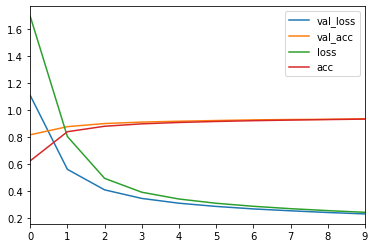

In [0]:
df = pd.DataFrame(history.history)
df.plot()
# 로스율이 점차 낮아지고 정확도가 점진적으로 상승하는걸 확인
# 훈련 정확도와 검증 정확도 (train,test)가 일치되는걸 확인

In [0]:
### 가중치와 반복횟수만으로 조금더 정확도를 올릴수있는가?

In [0]:
import tensorflow as tf

batch_size = 256
epochs = 30
with tf.device('/device:GPU:0'):
#   history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test), callbacks=[tbCallBack])
  history2 = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
# 128개의 가중치(batch_size)에서 256으로
# 10회(epochs)에서 ->30회로 반복한다

##### 가중치 256 에포크 30 검사결과

In [0]:
  score = model.evaluate(x_test, y_test, verbose=0)
  print(model.metrics_names)
  print('test loss: ', score[0])
  print('test acc: ', score[1])

  # 결과값은 미세하게 더 좋아졌다

['loss', 'acc']
test loss:  0.1657077456317842
test acc:  0.9518


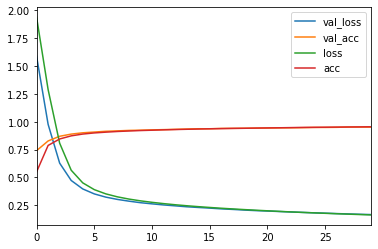

In [0]:
df2 = pd.DataFrame(history2.history)
df2.plot()

In [0]:
# 

In [0]:
import tensorflow as tf

batch_size = 512
epochs = 100
with tf.device('/device:GPU:0'):
#   history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test), callbacks=[tbCallBack])
  history3 = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
# 128개의 가중치(batch_size)로 10회(epochs) 반복한다

In [0]:
  score = model.evaluate(x_test, y_test, verbose=0)
  print(model.metrics_names)
  print('test loss: ', score[0])
  print('test acc: ', score[1])
  print('')
  # 

['loss', 'acc']
test loss:  0.10498826007861645
test acc:  0.9736


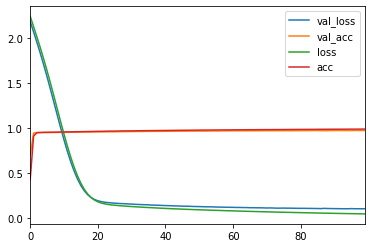

In [0]:
df2 = pd.DataFrame(history3.history)
df2.plot()

### 128/10 , 256/30, 512/100 진행결과

In [0]:
# 미세하지만 정확도와 손실율은 좋아짐 (acc: 93 -> 95 -> 97) loss : 0.22 -> 0.16 -> 0.10
# 원목은 과적합의 유발이었으나 시간관계상 다른쪽으로 테스트 진행

In [0]:
'''
 과적합을 막는방법
1. 데이터의 양을 늘리기
2. 모델의 복잡도 줄이기 : 복잡도는 은닉층(hidden layer)의 수나 매개변수의 수 등으로 결정됨
3. 가중치 규제(Regularization) 적용하기 : (L1,L2규제 등)
4. 드롭아웃(Dropout) : 학습 과정에서 신경망의 일부를 사용하지 않는 방법
'''

### activations방법 변경 -> sigmoid

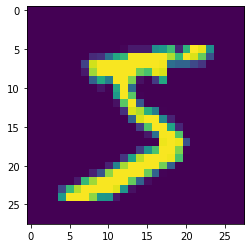

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_train[0])

In [0]:

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train sample')
print(x_test.shape[0], 'x_test sample')
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('x_train', x_train[0])
print('y_train', y_train[0])

In [0]:
model = Sequential()

In [0]:
model.add(Dense(512, activation='sigmoid', input_shape=(784,))) # input layer
model.add(Dense(512, activation='sigmoid')) # hidden layer1
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.00001), metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
 import tensorflow as tf

batch_size = 128
epochs = 10
with tf.device('/device:GPU:0'):
#   history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test), callbacks=[tbCallBack])
  history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
# 128개의 가중치(batch_size)로 10회(epochs) 반복한다
 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 37us/step - loss: 2.2538 - acc: 0.2914 - val_loss: 2.1609 - val_acc: 0.5573
Epoch 2/10
60000/60000 [==============================] - 2s 34us/step - loss: 2.0780 - acc: 0.6187 - val_loss: 1.9783 - val_acc: 0.6694
Epoch 3/10
60000/60000 [==============================] - 2s 33us/step - loss: 1.8743 - acc: 0.6935 - val_loss: 1.7479 - val_acc: 0.7353
Epoch 4/10
60000/60000 [==============================] - 2s 34us/step - loss: 1.6336 - acc: 0.7308 - val_loss: 1.4957 - val_acc: 0.7565
Epoch 5/10
60000/60000 [==============================] - 2s 35us/step - loss: 1.3879 - acc: 0.7590 - val_loss: 1.2590 - val_acc: 0.7833
Epoch 6/10
60000/60000 [==============================] - 2s 31us/step - loss: 1.1716 - acc: 0.7860 - val_loss: 1.0622 - val_acc: 0.8041
Epoch 7/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.9979 - acc: 0.8070 - val_loss: 0.9099 - val_acc

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print(model.metrics_names)
print('test loss: ', score[0])
print('test acc: ', score[1])


['loss', 'acc']
test loss:  0.6379282636642456
test acc:  0.86


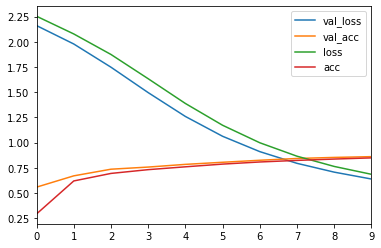

In [0]:
  # 결과값
df = pd.DataFrame(history.history)
df.plot()
# 로스율이 점차 낮아지고 정확도가 점진적으로 상승하는걸 확인
# 훈련 정확도와 검증 정확도 (train,test)가 일치되는걸 확인

In [0]:
# 결론 Activations에 따른 손실률과 정확도차이는 있다.(relu vs sigmoid 에서 각 첫회차의 값 batch 128/ epochs 10)
# relu 0.22 / 0.93  sigmoid : 0.63 / 0.86 